# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("file.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
#Import Json 
import json

# Fetch current BTC price
response_data = requests.get(btc_url)
response_content = response_data.content
btc_data = response_data.json()
print(json.dumps(btc_data, indent=3))
current_btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
response_data_1 = requests.get(eth_url)
response_content_1 = response_data_1.content
eth_data = response_data_1.json()
print(json.dumps(eth_data, indent=3))
current_eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = current_btc_price * my_btc
my_eth_value = current_eth_price * my_eth


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
   "data": {
      "1": {
         "id": 1,
         "name": "Bitcoin",
         "symbol": "BTC",
         "website_slug": "bitcoin",
         "rank": 1,
         "circulating_supply": 19326418,
         "total_supply": 19326418,
         "max_supply": 21000000,
         "quotes": {
            "USD": {
               "price": 28377.0,
               "volume_24h": 19933785089,
               "market_cap": 547045478794,
               "percentage_change_1h": -0.309518271719197,
               "percentage_change_24h": 3.3430787793148,
               "percentage_change_7d": 12.7824523985658,
               "percent_change_1h": -0.309518271719197,
               "percent_change_24h": 3.3430787793148,
               "percent_change_7d": 12.7824523985658
            },
            "CAD": {
               "price": 38550.1545,
               "volume_24h": 27080047043.4065,
               "market_cap": 743161282941.649,
               "percent_change_1h": -0.309518271719197,
               "p

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")



Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
start = pd.Timestamp("2023-03-20", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-03-20", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start, 
    end = end
).df

df_portfolio.head()

# Reorganize the DataFrame
agg = df_portfolio[df_portfolio["symbol"] == "AGG"].drop("symbol", axis=1)
spy = df_portfolio[df_portfolio["symbol"] == "SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([agg, spy], axis=1, keys = ["AGG", "SPY"])

# Preview DataFrame
df_portfolio

AGG                                            \
                            open   high     low close   volume trade_count   
timestamp                                                                    
2023-03-20 04:00:00+00:00  99.73  99.73  99.015  99.1  6346444       27948   

                                       SPY                                    \
                               vwap   open    high     low   close    volume   
timestamp                                                                      
2023-03-20 04:00:00+00:00  99.21433  390.8  394.17  390.07  393.74  93077851   

                                                   
                          trade_count        vwap  
timestamp                                          
2023-03-20 04:00:00+00:00      725845  392.355664

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.1
Current SPY closing price: $393.74


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19687.00
The current value of your 200 AGG shares is $19820.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_total = my_btc_value + my_eth_value
shares_total = my_agg_value + my_spy_value

# Set variables to store your values data and to set the index of the dataframe
values = {"amount": [crypto_total, shares_total]}
index = ["crypto", "shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(data = values, index = index)

# Display savings DataFrame
display(df_savings)

,amount
crypto,59365.428408
shares,39507.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

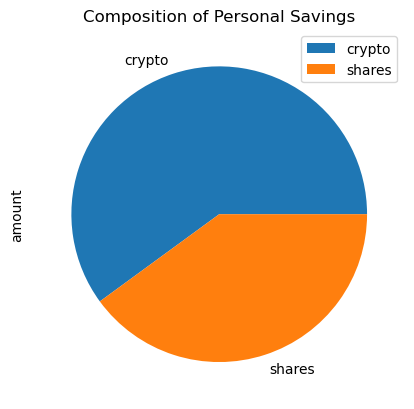

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_btc_value + my_eth_value + my_agg_value + my_spy_value
amount_short = round((total_savings - emergency_fund),2)

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough in savings for an emergency fund")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial savings goal")
elif total_savings < emergency_fund:
    print(f"Sorry, you are still {amount_short} away from reaching your goal")
    


Congratulations! You have enough in savings for an emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-03-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-03-21', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]

df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date, 
    end=end_date,
    limit=10000
).df

# Reorganize the DataFrame
# Separate ticker data
agg_5 = df_ticker[df_ticker["symbol"] == "AGG"].drop("symbol", axis=1)
spy_5 = df_ticker[df_ticker["symbol"] == "SPY"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_5, spy_5], axis=1, keys = ["AGG", "SPY"])

# Display sample data
df_stock_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-03-21 04:00:00+00:00  106.32  106.48  106.08  106.41  2994423   
2018-03-22 04:00:00+00:00  106.67  106.80  106.49  106.61  3334408   
2018-03-23 04:00:00+00:00  106.46  106.70  106.46  106.61  3618720   
2018-03-26 04:00:00+00:00  106.64  106.71  106.47  106.57  4546535   
2018-03-27 04:00:00+00:00  106.63  106.95  106.61  106.88  4566884   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2018-03-21 04:00:00+00:00       13898  106.284005  270.90  273.27  270.19   
2018-03-22 04:00:00+00:00       13773  106.616043  267.91  268.87  263.36   
2018-03-23 04:00:00+00:00       11823  106.607241  264.17  265.02  257.83   
2018-03-26 04:00:00+00:00       19722  106.583861  262.13  265.43  259.41   
2018-03-27 04:00:00+00:00       14293  106.826049  266.17  266.77  258.84   

                                                                       
                             close     volume trade_count        vwap  
timestamp                                                              
2018-03-21 04:00:00+00:00  270.400   78884438      330625  271.404380  
2018-03-22 04:00:00+00:00  263.710  149493729      577825  266.129101  
2018-03-23 04:00:00+00:00  258.015  183856351      624778  261.280967  
2018-03-26 04:00:00+00:00  265.140  143141239      450168  262.353110  
2018-03-27 04:00:00+00:00  260.760  130806695      538201  263.145788

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-03-21 04:00:00+00:00  106.32  106.48  106.08  106.41  2994423   
2018-03-22 04:00:00+00:00  106.67  106.80  106.49  106.61  3334408   
2018-03-23 04:00:00+00:00  106.46  106.70  106.46  106.61  3618720   
2018-03-26 04:00:00+00:00  106.64  106.71  106.47  106.57  4546535   
2018-03-27 04:00:00+00:00  106.63  106.95  106.61  106.88  4566884   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-03-21 04:00:00+00:00       13898  106.284005          NaN  270.90   
2018-03-22 04:00:00+00:00       13773  106.616043     0.001880  267.91   
2018-03-23 04:00:00+00:00       11823  106.607241     0.000000  264.17   
2018-03-26 04:00:00+00:00       19722  106.583861    -0.000375  262.13   
2018-03-27 04:00:00+00:00       14293  106.826049     0.002909  266.17   

                                                                           \
                             high     low    close     volume trade_count   
timestamp                                                                   
2018-03-21 04:00:00+00:00  273.27  270.19  270.400   78884438      330625   
2018-03-22 04:00:00+00:00  268.87  263.36  263.710  149493729      577825   
2018-03-23 04:00:00+00:00  265.02  257.83  258.015  183856351      624778   
2018-03-26 04:00:00+00:00  265.43  259.41  265.140  143141239      450168   
2018-03-27 04:00:00+00:00  266.77  258.84  260.760  130806695      538201   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-03-21 04:00:00+00:00  271.404380          NaN  
2018-03-22 04:00:00+00:00  266.129101    -0.024741  
2018-03-23 04:00:00+00:00  261.280967    -0.021596  
2018-03-26 04:00:00+00:00  262.353110     0.027615  
2018-03-27 04:00:00+00:00  263.145788    -0.016520

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/nickgracan/Python-Challenge-3/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012001,1.000606,0.996607,1.018164,0.994515,1.012491,1.010246,1.001863,0.988711,1.006853,...,1.002372,0.995862,1.008972,0.987905,0.999979,0.997677,0.985185,1.003424,1.002916,0.999737
2,1.014631,1.005423,0.991437,1.026841,1.006586,1.024885,1.014581,1.017959,0.980169,1.011275,...,0.994985,0.994476,0.997844,0.988066,0.995334,0.997177,0.989275,0.993799,1.005790,0.994142
3,1.024432,1.009537,0.996028,1.021529,1.020583,1.039409,1.024903,1.017874,0.976776,1.016210,...,0.999171,0.992700,1.003233,0.994463,0.998660,0.988914,0.985810,0.979971,1.025969,0.995512
4,1.021822,1.009209,0.987465,1.027205,1.006806,1.035171,1.022662,1.015300,0.969649,1.015146,...,1.012381,0.984587,0.990418,0.994605,0.984156,0.993245,0.987764,0.983904,1.029850,1.001811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.778657,3.136493,0.827335,15.027633,2.554238,2.631033,3.621544,1.568025,6.978391,1.946275,...,4.323147,4.100055,10.540762,7.895596,6.748213,12.460774,16.594824,15.636663,21.150803,2.559538
7557,6.829564,3.138050,0.818957,15.056358,2.535290,2.630532,3.624064,1.580172,6.992308,1.950129,...,4.298812,4.144482,10.498136,7.850849,6.716050,12.506284,16.540099,15.580695,21.354829,2.571199
7558,6.886978,3.129610,0.817769,15.025251,2.573066,2.642449,3.635449,1.570483,7.004926,1.930409,...,4.282042,4.142477,10.528524,7.945274,6.809318,12.703366,16.591064,15.371450,21.153515,2.586200
7559,6.924209,3.136112,0.808063,15.101909,2.584963,2.673100,3.646125,1.562145,7.000253,1.888279,...,4.342616,4.120676,10.460419,7.919214,6.794908,12.553163,16.693610,15.469463,21.089314,2.584471


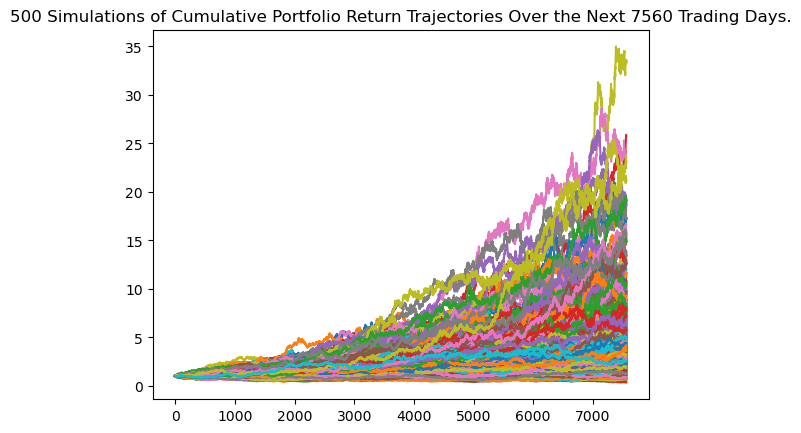

In [19]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()


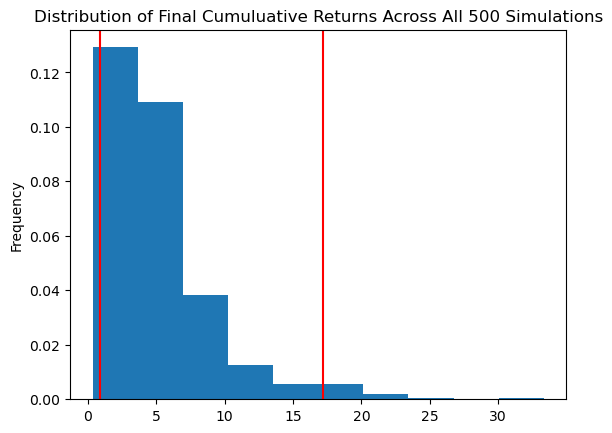

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()


### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              5.203891
std               4.058101
min               0.361601
25%               2.628652
50%               4.097798
75%               6.366452
max              33.332895
95% CI Lower      0.877641
95% CI Upper     17.213635
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $17552.82 and $344272.69


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $26329.23 and $516409.04


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_five_year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-03-21 04:00:00+00:00  106.32  106.48  106.08  106.41  2994423   
2018-03-22 04:00:00+00:00  106.67  106.80  106.49  106.61  3334408   
2018-03-23 04:00:00+00:00  106.46  106.70  106.46  106.61  3618720   
2018-03-26 04:00:00+00:00  106.64  106.71  106.47  106.57  4546535   
2018-03-27 04:00:00+00:00  106.63  106.95  106.61  106.88  4566884   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-03-21 04:00:00+00:00       13898  106.284005          NaN  270.90   
2018-03-22 04:00:00+00:00       13773  106.616043     0.001880  267.91   
2018-03-23 04:00:00+00:00       11823  106.607241     0.000000  264.17   
2018-03-26 04:00:00+00:00       19722  106.583861    -0.000375  262.13   
2018-03-27 04:00:00+00:00       14293  106.826049     0.002909  266.17   

                                                                           \
                             high     low    close     volume trade_count   
timestamp                                                                   
2018-03-21 04:00:00+00:00  273.27  270.19  270.400   78884438      330625   
2018-03-22 04:00:00+00:00  268.87  263.36  263.710  149493729      577825   
2018-03-23 04:00:00+00:00  265.02  257.83  258.015  183856351      624778   
2018-03-26 04:00:00+00:00  265.43  259.41  265.140  143141239      450168   
2018-03-27 04:00:00+00:00  266.77  258.84  260.760  130806695      538201   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-03-21 04:00:00+00:00  271.404380          NaN  
2018-03-22 04:00:00+00:00  266.129101    -0.024741  
2018-03-23 04:00:00+00:00  261.280967    -0.021596  
2018-03-26 04:00:00+00:00  262.353110     0.027615  
2018-03-27 04:00:00+00:00  263.145788    -0.016520

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/nickgracan/Python-Challenge-3/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.029258,0.998378,0.997177,1.012865,1.003488,1.004512,0.990391,0.982272,0.996014,0.995669,...,1.004327,1.004695,1.005133,1.003828,0.984231,1.002483,0.997014,0.992497,1.007641,1.013039
2,1.016394,1.000331,1.016131,1.026638,1.032146,1.008662,0.976504,0.967732,0.990259,0.980579,...,1.014964,1.010763,1.009702,1.002858,0.984007,1.005303,0.996176,1.005714,1.000636,1.011153
3,1.018185,0.998630,1.010662,1.024617,1.027522,1.016284,0.979697,0.946210,0.990213,0.981729,...,1.035602,1.022204,1.002234,1.005902,1.006648,1.007245,0.993846,1.014454,1.019820,1.008505
4,1.022378,1.008768,1.018103,1.018828,1.020910,1.007554,0.971321,0.945983,0.986747,0.972494,...,1.022401,1.028515,1.020563,1.002858,1.017784,1.032207,0.995878,1.017307,1.046292,0.997582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.937233,1.992538,1.489022,2.213881,0.882349,2.537306,1.769395,1.133550,1.983979,2.215213,...,0.946575,1.593042,1.412880,1.546053,1.016776,1.397112,0.538380,1.128667,1.122219,0.769623
1257,1.912595,1.946102,1.457767,2.212486,0.880219,2.516384,1.764881,1.132999,1.959345,2.210215,...,0.933601,1.572115,1.380632,1.566313,1.029036,1.398663,0.543179,1.142015,1.110221,0.764970
1258,1.903523,1.972054,1.460420,2.172766,0.886344,2.553208,1.759153,1.151268,1.955879,2.187462,...,0.924516,1.570691,1.358381,1.580099,1.041452,1.404340,0.536015,1.148595,1.115577,0.753164
1259,1.886811,1.955581,1.453380,2.158722,0.876317,2.549417,1.723864,1.143880,1.986724,2.161007,...,0.923424,1.598952,1.341789,1.547941,1.061417,1.414476,0.526060,1.145312,1.102952,0.752335


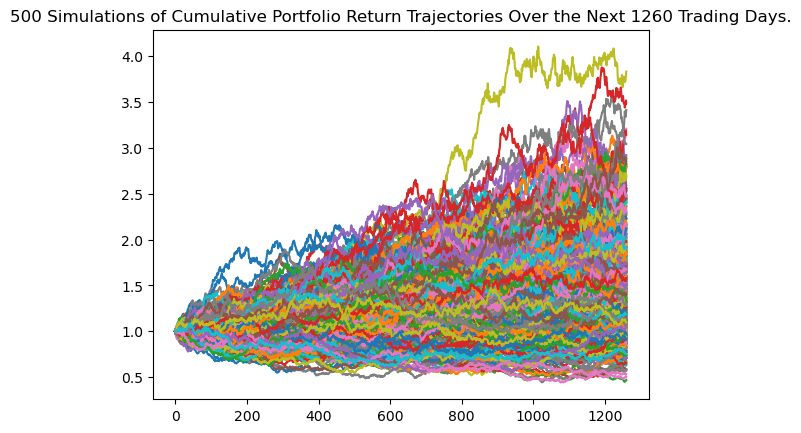

In [28]:
# Plot simulation outcomes
line_plot_1 = MC_five_year.plot_simulation()

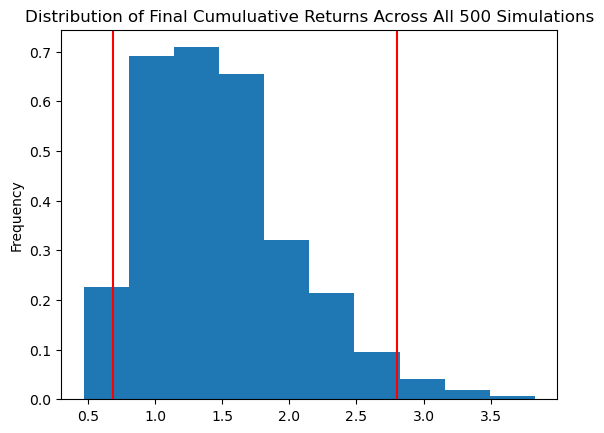

In [29]:
# Plot probability distribution and confidence intervals
dist_plot_1 = MC_five_year.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_1 = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_1)

count           500.000000
mean              1.489563
std               0.552734
min               0.470879
25%               1.088030
50%               1.437899
75%               1.776460
max               3.828679
95% CI Lower      0.686818
95% CI Upper      2.799440
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000 investment
ci_lower_five = round(tbl_1[8]*60000)
ci_upper_five = round(tbl_1[9]*60000)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $41209 and $167966


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_ten_year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-03-21 04:00:00+00:00  106.32  106.48  106.08  106.41  2994423   
2018-03-22 04:00:00+00:00  106.67  106.80  106.49  106.61  3334408   
2018-03-23 04:00:00+00:00  106.46  106.70  106.46  106.61  3618720   
2018-03-26 04:00:00+00:00  106.64  106.71  106.47  106.57  4546535   
2018-03-27 04:00:00+00:00  106.63  106.95  106.61  106.88  4566884   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-03-21 04:00:00+00:00       13898  106.284005          NaN  270.90   
2018-03-22 04:00:00+00:00       13773  106.616043     0.001880  267.91   
2018-03-23 04:00:00+00:00       11823  106.607241     0.000000  264.17   
2018-03-26 04:00:00+00:00       19722  106.583861    -0.000375  262.13   
2018-03-27 04:00:00+00:00       14293  106.826049     0.002909  266.17   

                                                                           \
                             high     low    close     volume trade_count   
timestamp                                                                   
2018-03-21 04:00:00+00:00  273.27  270.19  270.400   78884438      330625   
2018-03-22 04:00:00+00:00  268.87  263.36  263.710  149493729      577825   
2018-03-23 04:00:00+00:00  265.02  257.83  258.015  183856351      624778   
2018-03-26 04:00:00+00:00  265.43  259.41  265.140  143141239      450168   
2018-03-27 04:00:00+00:00  266.77  258.84  260.760  130806695      538201   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-03-21 04:00:00+00:00  271.404380          NaN  
2018-03-22 04:00:00+00:00  266.129101    -0.024741  
2018-03-23 04:00:00+00:00  261.280967    -0.021596  
2018-03-26 04:00:00+00:00  262.353110     0.027615  
2018-03-27 04:00:00+00:00  263.145788    -0.016520

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/nickgracan/Python-Challenge-3/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997978,1.004231,1.021309,1.005091,1.000506,0.994053,0.986476,0.996204,1.009845,0.986121,...,0.993732,1.011987,0.988903,1.002438,1.002127,0.988264,1.004671,1.009084,1.013387,1.015157
2,0.994380,0.994350,1.004672,0.995336,1.002340,1.009634,0.980020,1.004855,1.034035,0.985286,...,1.010735,1.027793,0.994671,0.998810,1.003498,0.996880,0.983307,1.016772,1.016063,1.004353
3,0.987665,0.999395,1.004201,0.999405,0.997078,1.008457,0.982321,1.011914,1.036085,0.988870,...,1.029867,1.026974,0.999670,0.997959,1.016368,0.986899,0.996327,1.049698,1.025327,0.998423
4,0.996058,1.004068,1.011810,0.993397,1.013228,1.005843,0.981989,1.014395,1.038406,0.966790,...,1.035418,1.032858,1.025328,0.984653,1.028605,0.972768,0.971129,1.049528,1.019066,1.023099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.342126,1.150664,3.023055,1.189420,3.353084,1.605587,1.578055,1.115352,2.598767,3.424770,...,2.126126,0.976867,1.411023,3.999004,3.438466,3.980858,1.441225,0.448450,1.728523,2.872605
2517,2.348626,1.166015,3.013254,1.177280,3.284920,1.592632,1.606422,1.086474,2.575831,3.438220,...,2.133610,0.989573,1.386975,4.029732,3.451686,3.994753,1.456173,0.450575,1.744714,2.907390
2518,2.339557,1.165420,2.995269,1.199671,3.281271,1.572103,1.618411,1.086128,2.542502,3.464044,...,2.124671,0.994150,1.380197,4.015871,3.500192,3.998586,1.445428,0.454958,1.739582,2.879831
2519,2.344833,1.155189,2.977354,1.178069,3.287079,1.573278,1.580725,1.090013,2.520346,3.530710,...,2.141943,0.984297,1.405730,3.994394,3.451377,4.036554,1.451948,0.458111,1.735866,2.868600


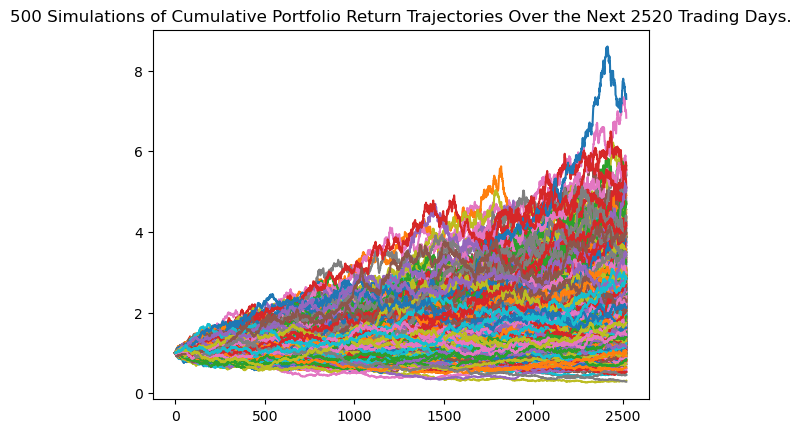

In [34]:
# Plot simulation outcomes
line_plot_2 = MC_ten_year.plot_simulation()

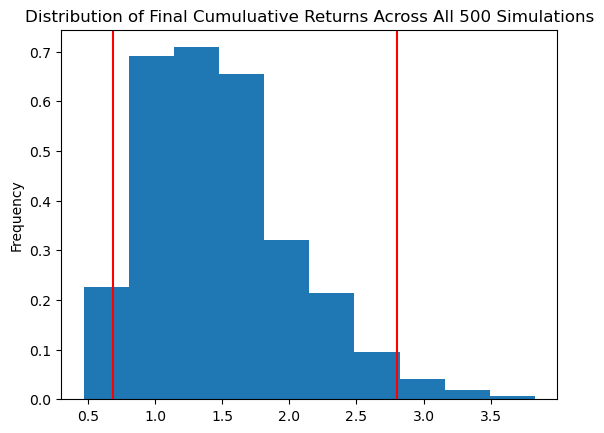

In [35]:
# Plot probability distribution and confidence intervals
dist_plot_1 = MC_five_year.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_2 = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_2)

count           500.000000
mean              2.143670
std               1.130304
min               0.284792
25%               1.321025
50%               1.847963
75%               2.659733
max               7.294172
95% CI Lower      0.713385
95% CI Upper      5.075460
Name: 2520, dtype: float64


In [38]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_2[8]*60000)
ci_upper_ten = round(tbl_2[9]*60000)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $42803 and $304528
